In [2]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

0 [-0.1487993] [ 1.04484963]


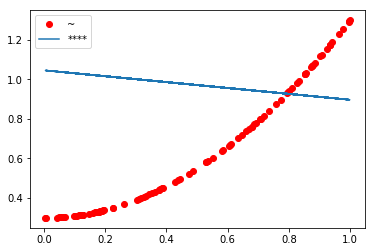

20 [ 0.74319518] [ 0.28491575]


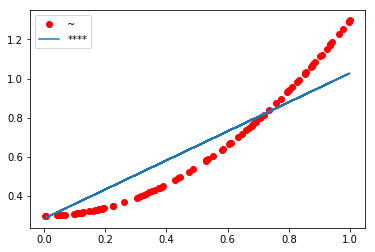

40 [ 0.95555156] [ 0.16984397]


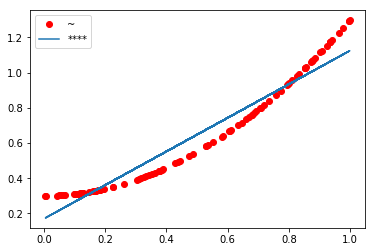

60 [ 1.00029564] [ 0.14559807]


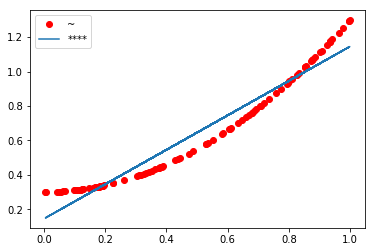

80 [ 1.00972331] [ 0.1404894]


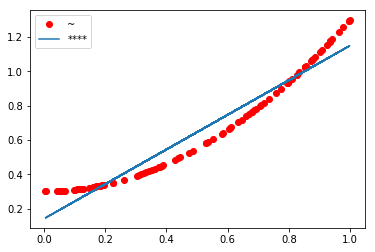

100 [ 1.01170969] [ 0.13941297]


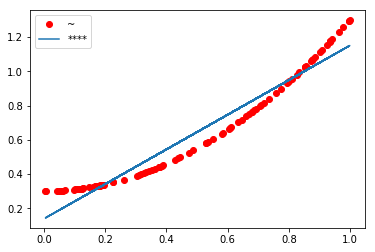

120 [ 1.01212835] [ 0.13918614]


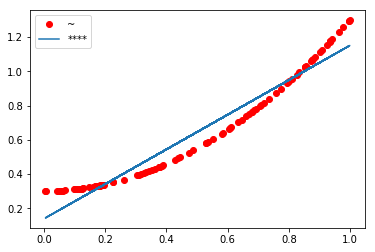

140 [ 1.01221657] [ 0.13913833]


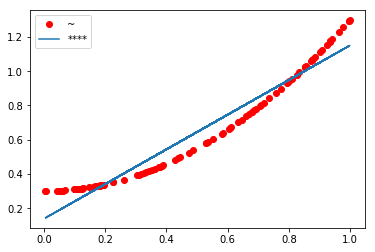

160 [ 1.01223516] [ 0.13912824]


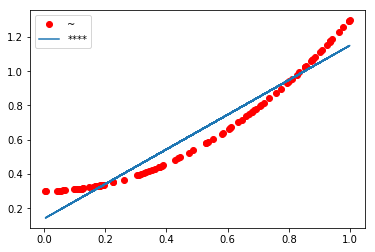

180 [ 1.0122391] [ 0.13912614]


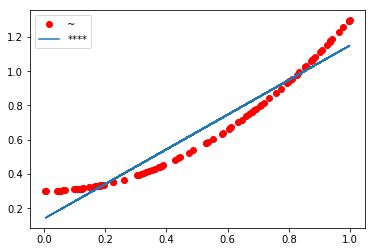

200 [ 1.01223946] [ 0.1391259]


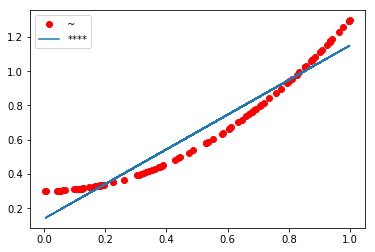

In [4]:
# tf with linear regression

x_data = np.random.rand(100).astype(np.float32)
y_data = np.square(x_data) + 0.3

Weights = tf.Variable(tf.random_uniform([1], -1, 1))
biases = tf.Variable(tf.zeros([1]) + 0.1)
y =  Weights*x_data + biases

loss = tf.reduce_mean(tf.square(y_data - y))
train = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for i in range(201):
        sess.run(train)
        if i%20 ==0:
            print i, sess.run(Weights), sess.run(biases)
            plt.plot(x_data, y_data, 'ro', label="~")
            plt.plot(x_data, sess.run(Weights) * x_data + sess.run(biases), label = "****")
            plt.legend()
            plt.show()

0 [[-1.06346214]
 [-0.01036012]
 [-0.20361006]
 [-0.15151054]
 [ 0.58459872]] [-0.98576128]


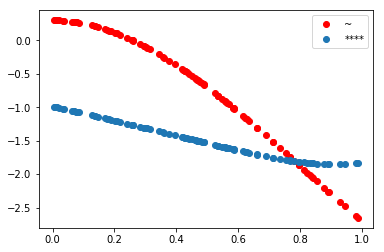

20 [[-1.43959105]
 [-0.59438902]
 [-0.76810652]
 [-0.65384287]
 [ 0.14614174]] [ 0.33693108]


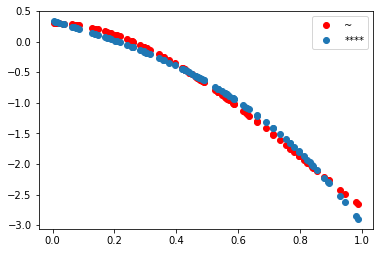

40 [[-1.5154804 ]
 [-0.63712549]
 [-0.76434314]
 [-0.614842  ]
 [ 0.20882438]] [ 0.37242463]


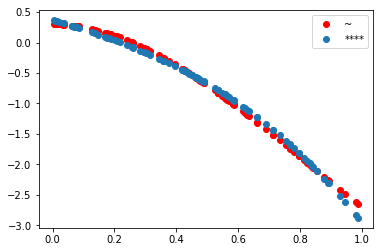

60 [[-1.56409466]
 [-0.66626477]
 [-0.75796586]
 [-0.58007854]
 [ 0.263161  ]] [ 0.39048877]


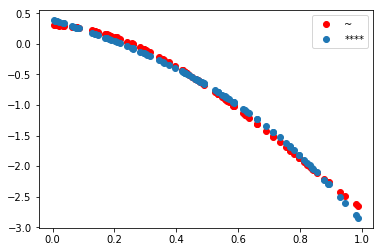

80 [[-1.59685516]
 [-0.69116098]
 [-0.7554574 ]
 [-0.55389553]
 [ 0.30629849]] [ 0.40332755]


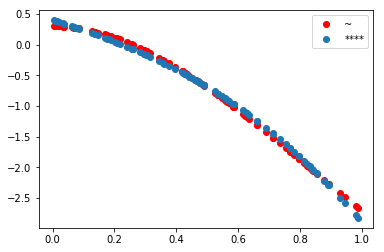

100 [[-1.61807466]
 [-0.71297365]
 [-0.75582594]
 [-0.53407454]
 [ 0.34112424]] [ 0.41242883]


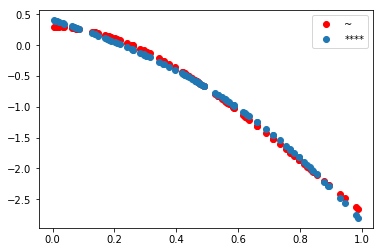

120 [[-1.63086581]
 [-0.73248613]
 [-0.7582764 ]
 [-0.51892477]
 [ 0.36981505]] [ 0.41879457]


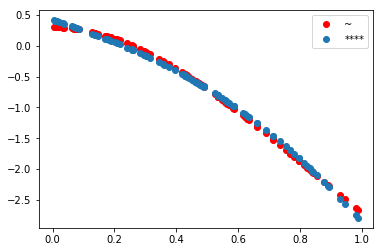

140 [[-1.63751006]
 [-0.7502721 ]
 [-0.76222521]
 [-0.50720561]
 [ 0.39396822]] [ 0.42315838]


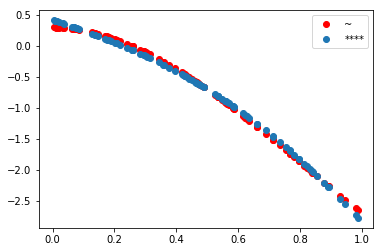

160 [[-1.63967979]
 [-0.76675302]
 [-0.76724505]
 [-0.49800715]
 [ 0.4147552 ]] [ 0.42605788]


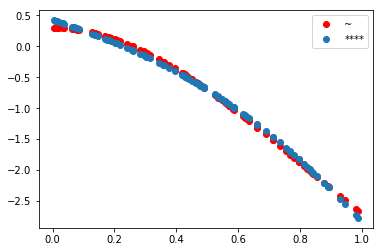

180 [[-1.63860047]
 [-0.78223795]
 [-0.77302283]
 [-0.49066266]
 [ 0.43303534]] [ 0.42788744]


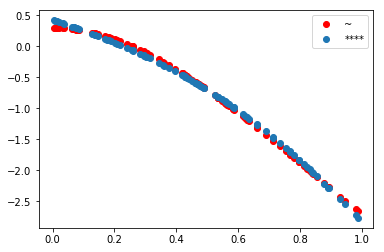

200 [[-1.63517046]
 [-0.79695415]
 [-0.77932924]
 [-0.48468301]
 [ 0.44943926]] [ 0.42893609]


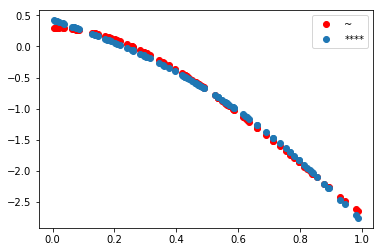

In [5]:
# tf with ^2 regression

x_data = np.random.rand(100,1).astype(np.float32)
y_data = 2*x_data**3 - 5*np.square(x_data) + 0.3
data = tf.concat([x_data,x_data**2,x_data**3,x_data**4,x_data**5],1)

Weights = tf.Variable(tf.random_uniform([5,1], -1, 1))
biases = tf.Variable(tf.zeros([1]) + 0.1)
y = tf.matmul(data,Weights) + biases

loss = tf.reduce_mean(tf.square(y_data - y))
train = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for i in range(201):
        sess.run(train)
        if i%20 ==0:
            print i, sess.run(Weights), sess.run(biases)
            plt.plot(x_data, y_data, 'ro', label="~")
            y = tf.add(tf.matmul(data,sess.run(Weights)),sess.run(biases)).eval()
            plt.plot(x_data, y, 'o', label = "****")
            plt.legend()
            plt.show()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
<class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>
55000
5000
10000
讓我們看一下 MNIST 訓練還有測試的資料集長得如何

 train_img 的 type : <type 'numpy.ndarray'>
 train_img 的 dimension : (55000, 784)
 train_label 的 type : <type 'numpy.ndarray'>
 train_label 的 dimension : (55000, 10)
 test_img 的 type : <type 'numpy.ndarray'>
 test_img 的 dimension : (10000, 784)
 test_label 的 type : <type 'numpy.ndarray'>
 test_label 的 dimension : (10000, 10)
0
3
4


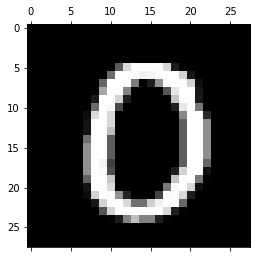

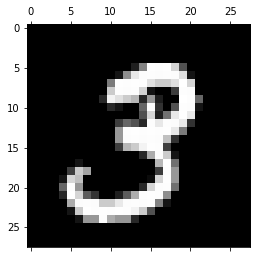

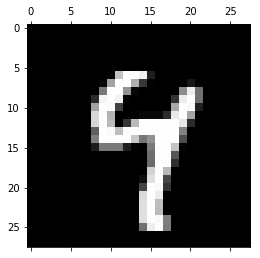

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

print type(mnist)
print mnist.train.num_examples
print mnist.validation.num_examples
print mnist.test.num_examples

print("讓我們看一下 MNIST 訓練還有測試的資料集長得如何")
train_img = mnist.train.images
train_label = mnist.train.labels
test_img = mnist.test.images
test_label = mnist.test.labels
print
print " train_img 的 type : %s" % (type(train_img))
print " train_img 的 dimension : %s" % (train_img.shape,)
print " train_label 的 type : %s" % (type(train_label))
print " train_label 的 dimension : %s" % (train_label.shape,)
print " test_img 的 type : %s" % (type(test_img))
print " test_img 的 dimension : %s" % (test_img.shape,)
print " test_label 的 type : %s" % (type(test_label))
print " test_label 的 dimension : %s" % (test_label.shape,)

trainimg = mnist.train.images
trainlabel = mnist.train.labels

randidx = np.random.randint(trainimg.shape[0], size=1)


for i in [10,1,2]:
    curr_img = np.reshape(trainimg[i, :], (28,28))
    curr_label = np.argmax(trainlabel[i, :])
    print curr_label
    plt.matshow(curr_img, cmap='gray')
    